In [1]:
%matplotlib inline

This page, first, loads a csv file including quantitative evaluation of BRAINSABC results on BrainWeb data.
Then, different plots are shown based on different methods in BRAINSABC.

In each plot, x-axis is 'noise', and y-axis is 'dice index'.

In [2]:
import numpy as np
import pandas as pd
from ggplot import *

In [3]:
csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG_onlyKNN_SPIE2016/statistics.csv'
DataFrame = pd.read_csv(csv_fn)

# First experiment
In the first experiment, we are going to show the effect of using KNN classifier on BRAINSABC results.
In this experiment, two modalities (T1 and T2) are used for classification, and the dice index is shown with and without KNN.

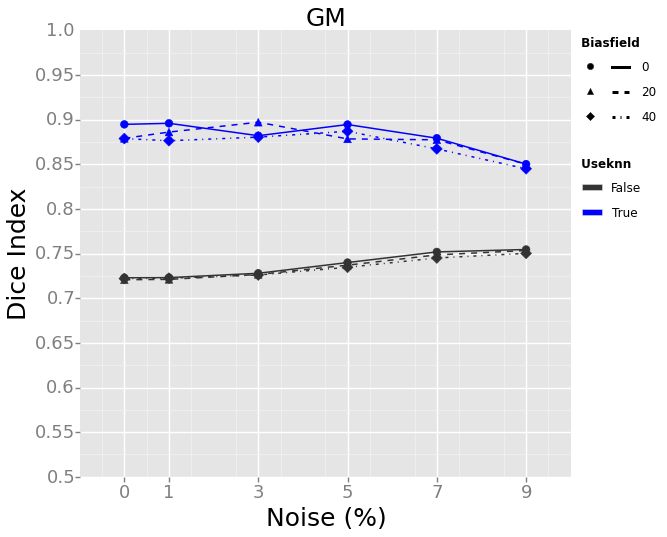

<ggplot: (285082241)>


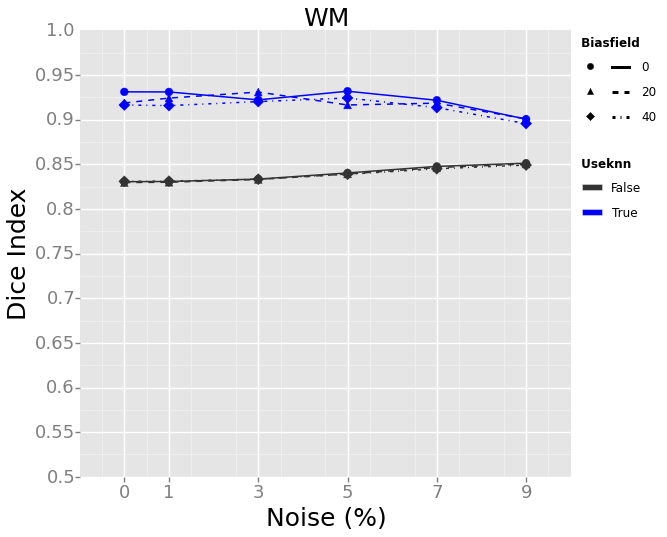

<ggplot: (287274825)>


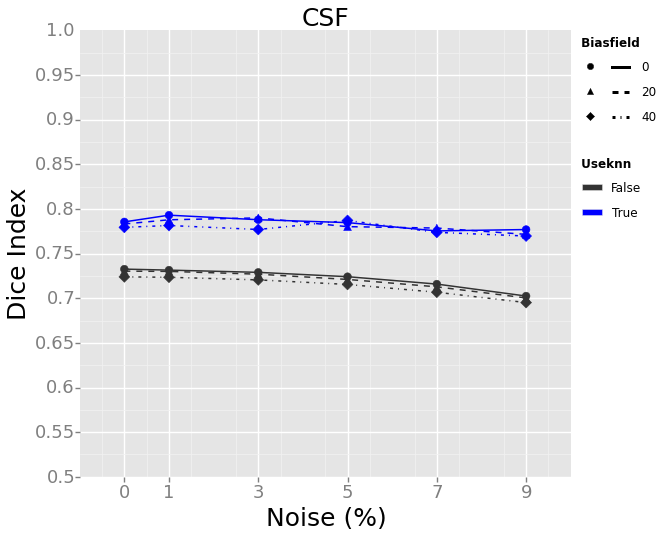

<ggplot: (287073849)>


In [35]:
#metric='hausdorffAvg'; label='Hausdorff Distance Avg.'
#ylim1=0.0; ylim2=1.1
metric='dice'; label='Dice Index'
ylim1=0.5; ylim2=1.00

df1 = DataFrame.loc[(DataFrame.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#333333','#0000FF')) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p1)

df2 = DataFrame.loc[(DataFrame.roi == 'WM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#333333','#0000FF')) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p2)

df3 = DataFrame.loc[(DataFrame.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#333333','#0000FF')) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p3)

Results show that using KNN method, in addition to EM segmentation, improves the segmentation accuracy.
From now, in all future exeperiments, KNN is used for the classification.

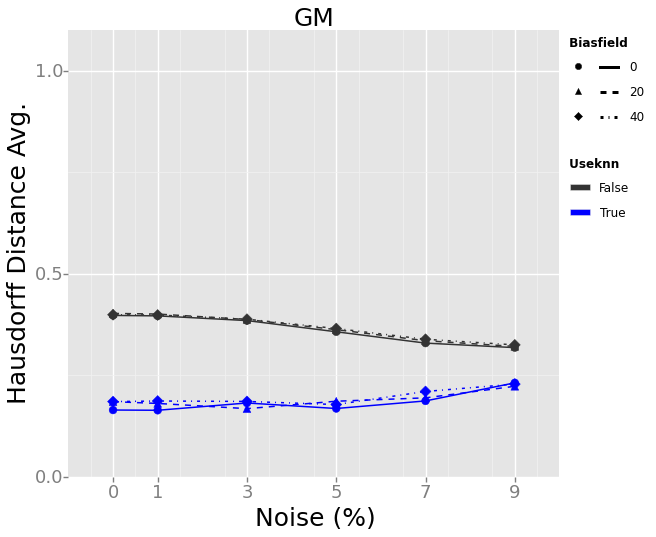

<ggplot: (285706621)>


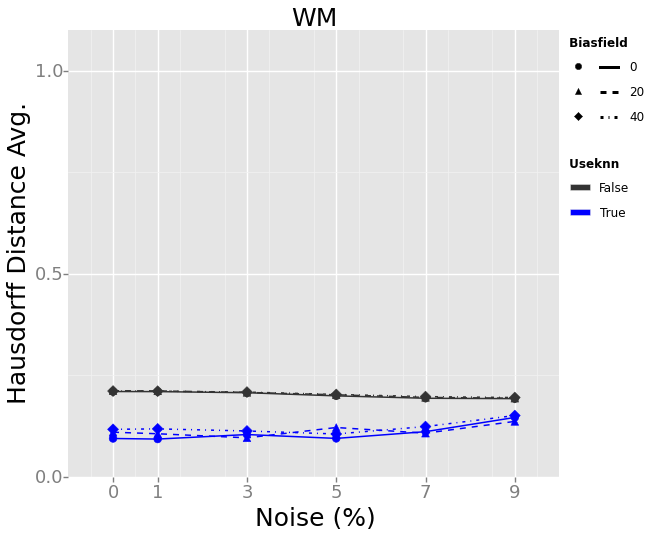

<ggplot: (285049349)>


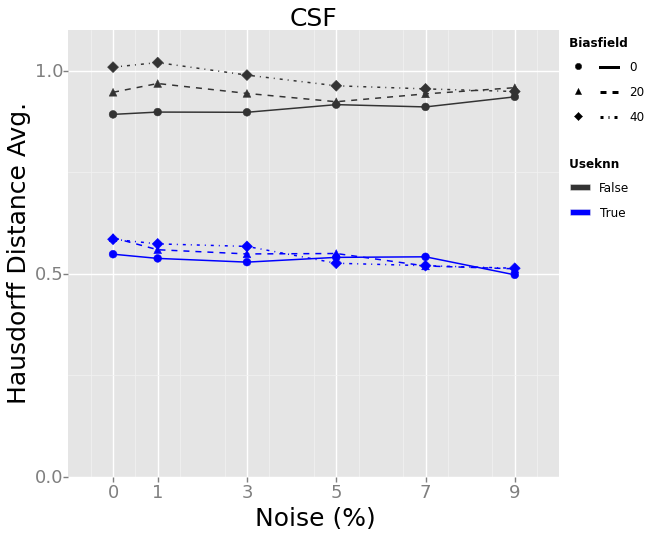

<ggplot: (285720837)>


In [36]:
metric='hausdorffAvg'; label='Hausdorff Distance Avg.'
ylim1=0.0; ylim2=1.1
#metric='dice'; label='Dice Index'
#ylim1=0.6; ylim2=1.00

df1 = DataFrame.loc[(DataFrame.roi == 'GM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ scale_y_continuous(breaks=(0.0,0.1,0.2,0.3,0.4,0.5)) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#333333','#0000FF')) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p1)

df2 = DataFrame.loc[(DataFrame.roi == 'WM') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=60) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ scale_y_continuous(breaks=(0.0,0.2,0.4,0.6,0.8,1.0)) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#333333','#0000FF')) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p2)

df3 = DataFrame.loc[(DataFrame.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    #(DataFrame.biasField == 0) & # biasField (0 or 20 or 40)
                    (DataFrame.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    (DataFrame.t2resolution == 1) & # if multimodality + resolution
                    #(DataFrame.useKnn == True) & # use knn or not
                    (DataFrame.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='useKnn', linetype='biasField', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=60,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#333333','#0000FF')) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p3)